In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)
from scipy import linalg as la
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
#N
N=1000

#x1 distributed as N(0,1)
x1 = np.random.normal(0,1,N)
#x2 distributed as x1+N(0,3)
x2 = x1+np.random.normal(0,3,N)
#x3 distributed as 2x1+x2
x3 = 2*x1+x2

In [4]:
dataset = np.column_stack((x1,x2,x3))

cov_mat = np.cov(dataset.T)

In [5]:
#eigenvectors and eigenvalues
l, V = la.eig(cov_mat)

print('\nDataset:', dataset.shape, '\nCovariance Matrix Size:',cov_mat.shape)
print('\nEigen Values:\n',np.real_if_close(l))
print('\nEigen Vector:\n',V)

pd.DataFrame(dataset)


Dataset: (1000, 3) 
Covariance Matrix Size: (3, 3)

Eigen Values:
 [ 2.64557028e+01 -2.32335092e-15  1.90192884e+00]

Eigen Vector:
 [[-0.11305445 -0.81649658  0.56617314]
 [-0.5803632  -0.40824829 -0.704636  ]
 [-0.8064721   0.40824829  0.42771029]]


,0,1,2
0,0.471435,-4.275189,-3.332319
1,-1.190976,-6.051546,-8.433498
2,1.432707,1.572393,4.437807
3,-0.312652,-5.352138,-5.977442
4,-0.720589,3.467088,2.025911
...,...,...,...
995,0.272164,2.169901,2.714229
996,0.931546,6.971691,8.834783
997,0.327532,2.671921,3.326986
998,0.740814,7.182269,8.663897


In [6]:
#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(dataset)
l_svd=spectrum**2/(N-1)
V_svd=U
print('Eigenvalues:','\n',l_svd,'\n')
print('Eigenvectors:','\n',V_svd)

#not the same values

Eigenvalues: 
 [2.65053699e+01 1.90220668e+00 5.87391301e-31] 

Eigenvectors: 
 [[ 3.14372144e-02  4.25148041e-02  6.43991980e-01 ... -1.86259631e-02
  -4.85806860e-02  3.36460373e-02]
 [ 6.42078876e-02 -4.32044875e-04  7.41662817e-01 ...  1.48424819e-02
   3.76541998e-02 -2.00625548e-02]
 [-2.85961416e-02  3.67493317e-02  7.27304177e-03 ...  1.40701327e-02
   4.25656736e-02 -1.33668586e-02]
 ...
 [-2.62462522e-02 -6.27769320e-03  3.29077279e-03 ...  9.99245161e-01
  -2.02940653e-03  1.02406184e-03]
 [-6.90706919e-02 -2.14284663e-02  9.68729232e-03 ... -2.03189022e-03
   9.94511896e-01  2.69423058e-03]
 [ 3.85646750e-02 -3.76731604e-03 -9.68636643e-03 ...  1.09997762e-03
   2.92493506e-03  9.98382261e-01]]


In [10]:
#variability
l = np.real_if_close(l)
Lambda = np.diag(l)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
var=[]
for i in range(3):
    var.append(Lambda[i,i]/np.trace(Lambda))
print('Variability of the principal components: ','\n', var,'\n' )
print('Total variability of the principal components: ','\n', sum(var)*100 , '%\n' )
print('Taking the first and third principal components total variability: ','\n',(var[0]+var[2])/sum(var)*100 , '%') #very close to one( > 99% and < 100% )

Lambda:  
 [[ 2.64557028e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.32335092e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.90192884e+00]] 

Trace: 
 28.357631659205122 

Variability of the principal components:  
 [0.9329306175406453, -8.193035807113068e-17, 0.06706938245935477] 

Total variability of the principal components:  
 100.0 %

Taking the first and third principal components total variability:  
 100.0 %


In [13]:
#rotation using the eigen_vectors

new_data = np.dot(V.T,dataset.T)
new_data = new_data.T

new_data

array([[ 5.11528633e+00,  3.29823682e-15,  1.85409897e+00],
       [ 1.04481205e+01,  2.02337470e-16, -1.72547866e-02],
       [-4.65349991e+00,  3.14791989e-15,  1.60129127e+00],
       ...,
       [-4.27083473e+00, -4.40963110e-16, -2.74305721e-01],
       [-1.12392679e+01, -1.95484534e-15, -9.35818735e-01],
       [ 6.27539499e+00, -7.97084106e-16, -1.63278199e-01]])

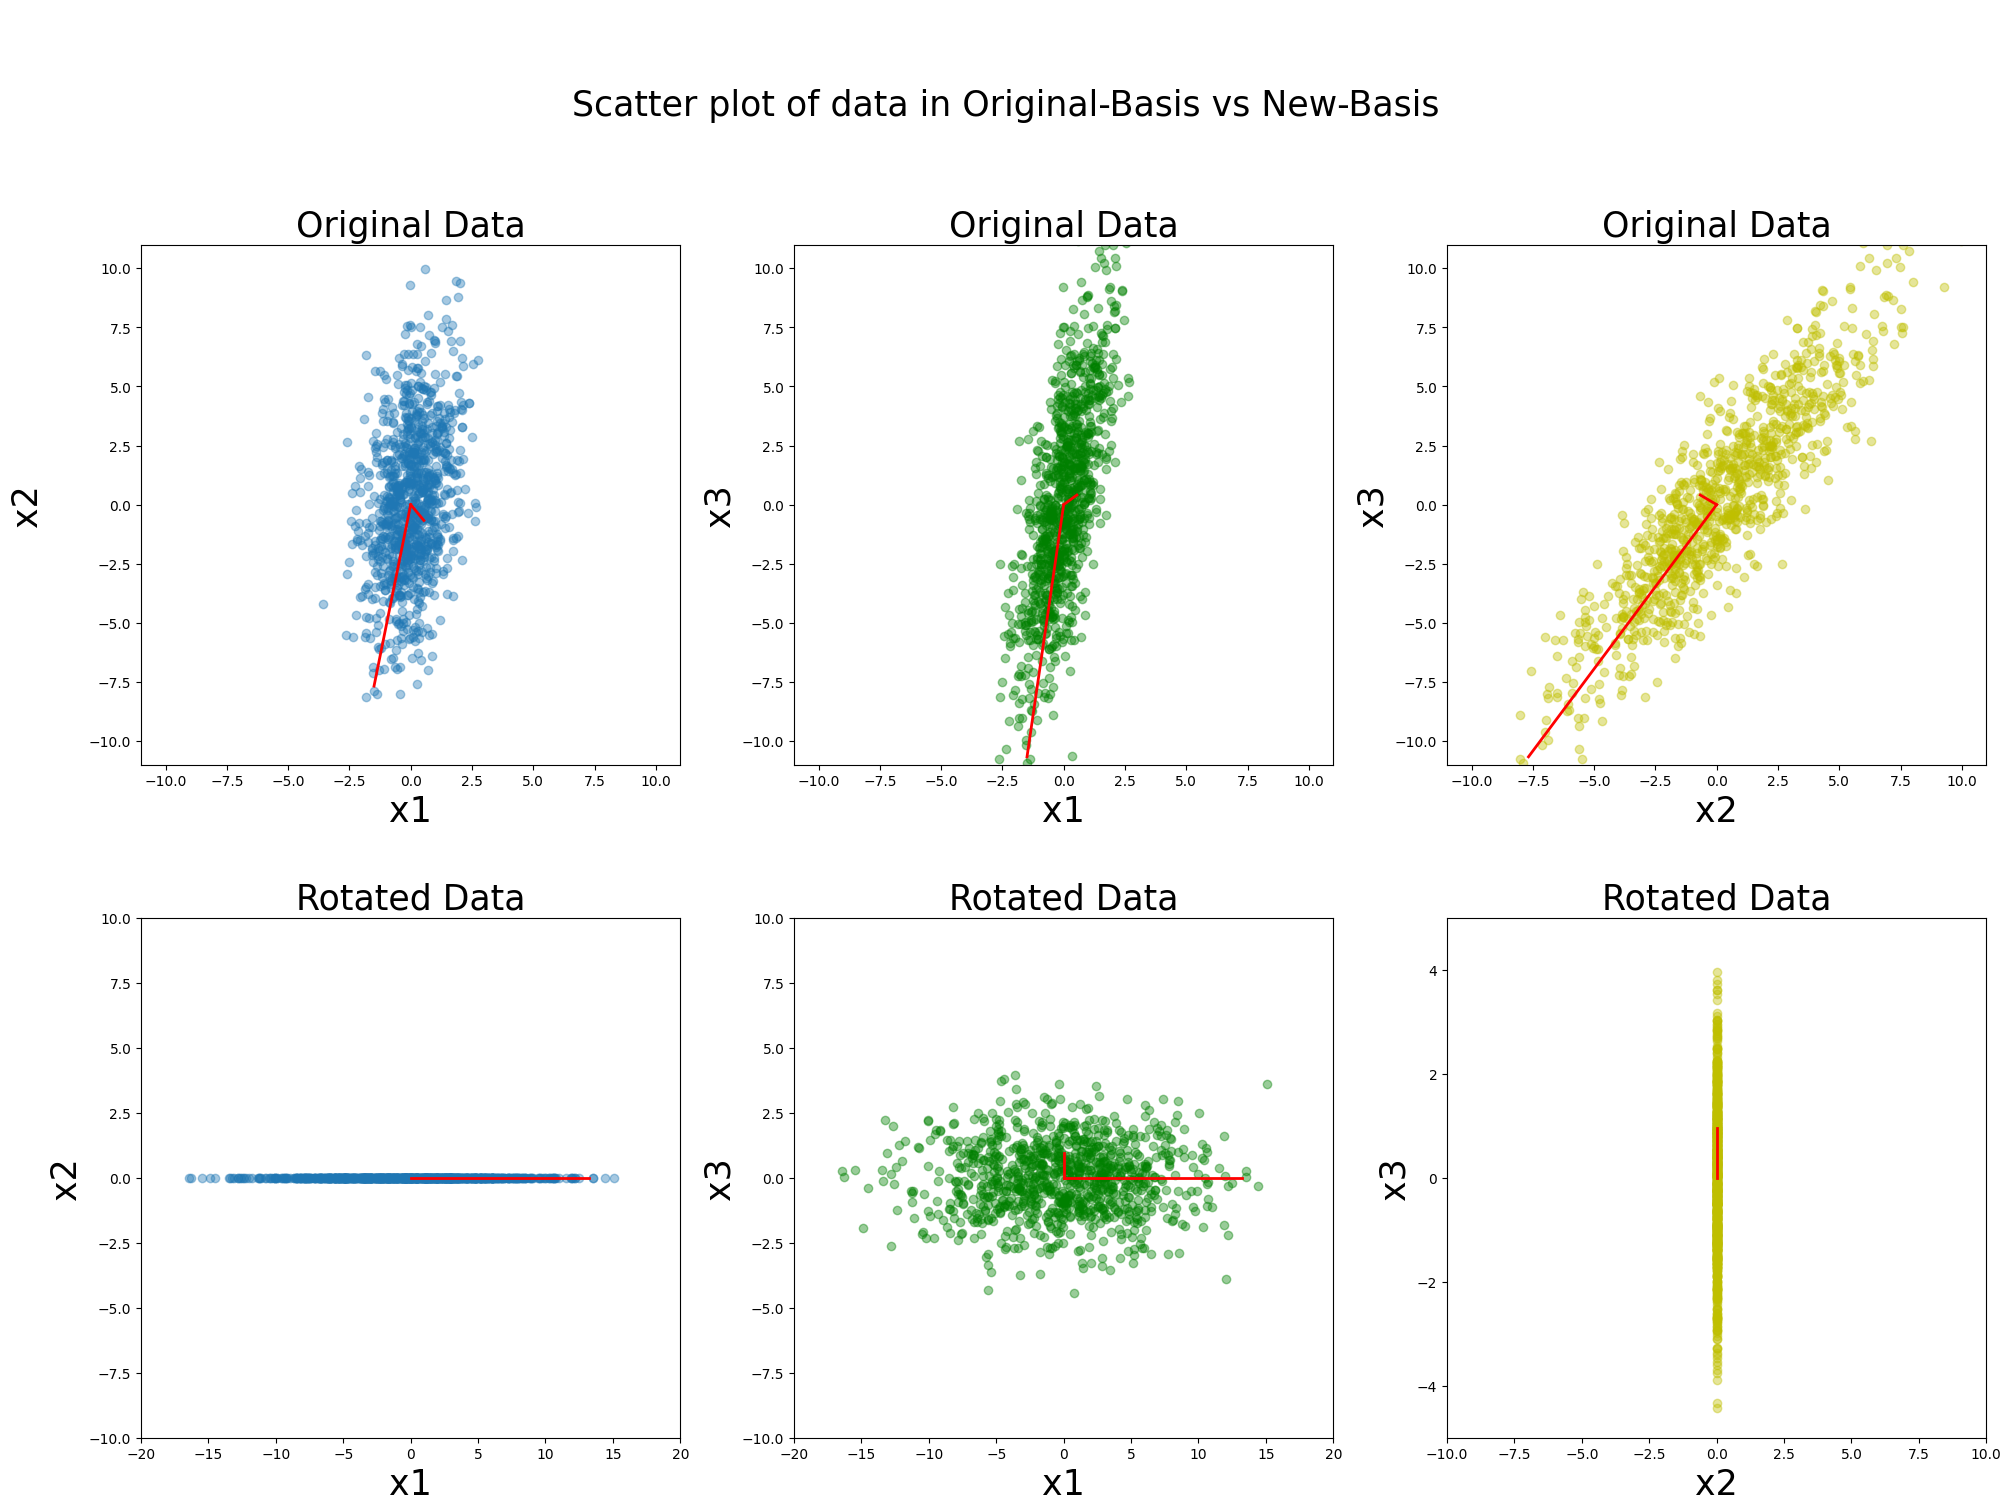

In [14]:
eig_val = l
eig_vectors = V

scale_factor = 0.5

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3, constrained_layout=True, figsize=(20,15))


ax1.scatter(x1,x2,alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax1.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax1.set_title('Original Data',fontsize = 25)
ax1.set_xlabel('x1\n', fontsize = 25)
ax1.set_ylabel('x2\n', fontsize = 25)
ax1.axis([-11,11,-11,11])

ax2.scatter(x1,x3, color = 'g',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax2.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax2.set_title('Original Data',fontsize = 25)
ax2.set_xlabel('x1', fontsize = 25)
ax2.set_ylabel('x3', fontsize = 25)
ax2.axis([-11,11,-11,11])

ax3.scatter(x2,x3, color = 'y',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax3.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax3.set_title('Original Data',fontsize = 25)
ax3.set_xlabel('x2', fontsize = 25)
ax3.set_ylabel('x3', fontsize = 25)
ax3.axis([-11,11,-11,11])

ax4.scatter(new_data[:,0],new_data[:,1],alpha = 0.4)
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax4.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax4.set_title('Rotated Data',fontsize = 25)
ax4.set_xlabel('x1', fontsize = 25)
ax4.set_ylabel('x2', fontsize = 25)
ax4.axis([-20,20,-10,10])

ax5.scatter(new_data[:,0],new_data[:,2],alpha = 0.4, color = 'g')
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax5.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax5.set_title('Rotated Data',fontsize = 25)
ax5.set_xlabel('x1', fontsize = 25)
ax5.set_ylabel('x3', fontsize = 25)
ax5.axis([-20,20,-10,10])

ax6.scatter(new_data[:,1],new_data[:,2],alpha = 0.4, color = 'y')
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax6.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax6.set_title('Rotated Data',fontsize = 25)
ax6.set_xlabel('x2', fontsize = 25)
ax6.set_ylabel('x3', fontsize = 25)
ax6.axis([-10,10,-5,5])

fig.suptitle('\n\nScatter plot of data in Original-Basis vs New-Basis\n\n', fontsize = 25)
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [16]:
#noise
noise_variables = [np.random.normal(0,1/(20+i), 1000) for i in range(0,10)]

In [17]:
#matrix of the dataset
nd_dataset = np.append(dataset,np.array(noise_variables).T, axis = 1)
pd.DataFrame(nd_dataset)
print('Matrix of the dataset:','\n',nd_dataset,'\n')
#covariance matrix
ndcov_mat = np.cov(nd_dataset.T)
print('Covariance matrix:','\n',ndcov_mat,'\n')

Matrix of the dataset: 
 [[ 4.71435164e-01 -4.27518883e+00 -3.33231850e+00 ... -5.13962597e-02
   2.64695301e-02 -4.24984877e-02]
 [-1.19097569e+00 -6.05154634e+00 -8.43349773e+00 ...  5.00539687e-02
   1.16687102e-02 -7.99960696e-02]
 [ 1.43270697e+00  1.57239264e+00  4.43780658e+00 ... -2.25817620e-03
   2.37943242e-02  2.29477126e-03]
 ...
 [ 3.27532331e-01  2.67192101e+00  3.32698567e+00 ... -3.89800257e-02
  -1.51505332e-02 -6.06294799e-02]
 [ 7.40813801e-01  7.18226910e+00  8.66389670e+00 ... -1.84330778e-02
   2.91118613e-02 -2.86774892e-02]
 [-8.01905048e-01 -3.52695664e+00 -5.13076673e+00 ... -9.48171106e-03
   3.25639297e-02  2.42348909e-02]] 

Covariance matrix: 
 [[ 9.47805634e-01  9.77061687e-01  2.87267296e+00  1.76363366e-03
  -9.35108334e-04  5.10278025e-04  1.57488992e-03  8.82855281e-04
   4.34402518e-04 -1.21024491e-03 -1.20378412e-04 -7.23958632e-04
   1.02041008e-03]
 [ 9.77061687e-01  9.85517837e+00  1.18093017e+01  9.65063573e-03
   1.25809036e-03  4.16472976e-03

In [18]:
#eigenvectors and eigenvalues
nl, nV = la.eig(ndcov_mat)
print('Eigenvalues:','\n',nl,'\n')
print('Eigenvectors:','\n',nV)

Eigenvalues: 
 [ 2.64557251e+01+0.j  1.90194148e+00+0.j -2.50915758e-15+0.j
  2.46032431e-03+0.j  2.23918973e-03+0.j  2.15886890e-03+0.j
  1.89512263e-03+0.j  1.16222270e-03+0.j  1.24024268e-03+0.j
  1.34576537e-03+0.j  1.49194607e-03+0.j  1.67210594e-03+0.j
  1.61018320e-03+0.j] 

Eigenvectors: 
 [[ 1.13054370e-01 -5.66171343e-01 -8.16496581e-01 -1.45186496e-04
  -5.31928488e-04  2.95775273e-04 -5.44505512e-04  3.74451312e-04
  -5.18403287e-04 -7.08889935e-04 -1.84196445e-04 -5.89158102e-04
  -2.69375759e-04]
 [ 5.80362996e-01  7.04633216e-01 -4.08248290e-01  6.22707721e-04
   5.07264691e-04 -5.44474998e-04  6.92880785e-04 -4.73896528e-04
   6.50119763e-04  1.23699843e-03  3.25625610e-04  6.61373547e-04
   1.18724052e-04]
 [ 8.06471735e-01 -4.27709470e-01  4.08248290e-01  3.32334729e-04
  -5.56592285e-04  4.70755490e-05 -3.96130239e-04  2.75006097e-04
  -3.86686810e-04 -1.80781442e-04 -4.27672803e-05 -5.16942658e-04
  -4.20027466e-04]
 [ 6.21015394e-04  8.71461535e-05  1.02324139e-15 

In [19]:
#eigenvectors and eigenvalues using SVD
nU, nspectrum, nVt = la.svd(nd_dataset)
nl_svd=nspectrum**2/(N-1)
nV_svd=nU
print('Eigenvalues:','\n',nl_svd,'\n')
print('Eigenvectors:','\n',nV_svd)

Eigenvalues: 
 [2.65053931e+01 1.90221933e+00 2.46404282e-03 2.24324896e-03
 2.15916209e-03 1.89530681e-03 1.67211100e-03 1.61102980e-03
 1.49233701e-03 1.34577363e-03 1.24097886e-03 1.16223421e-03
 8.58639774e-31] 

Eigenvectors: 
 [[ 3.14370230e-02  4.25132796e-02  3.48287588e-02 ...  1.45130370e-02
   4.59721092e-03 -8.77590529e-03]
 [ 6.42078072e-02 -4.33359603e-04 -5.94377358e-02 ...  1.78349617e-02
   6.36565054e-02 -1.53001885e-02]
 [-2.85958279e-02  3.67479918e-02  1.25826582e-03 ... -1.67800792e-02
  -2.70027507e-02  2.75385384e-02]
 ...
 [-2.62465720e-02 -6.28128450e-03 -6.13184999e-03 ...  9.89736362e-01
  -5.43065802e-03  2.65823752e-03]
 [-6.90712721e-02 -2.14300464e-02 -8.00388535e-02 ... -4.30461357e-03
   9.81786372e-01 -1.18581132e-03]
 [ 3.85644367e-02 -3.76928367e-03 -3.83532350e-02 ...  2.71106271e-03
   6.91598495e-04  9.92991064e-01]]


In [21]:
#variability
nl = np.real_if_close(nl)
Lambda = np.diag(nl)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
for i in range(0, len(nl)):
    print("By selecting the component x%i, we retain %.2f%% of the total variability" %  ((i+1),abs(Lambda[i, i]/Lambda.trace()*100)))

Lambda:  
 [[ 2.64557251e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.90194148e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.50915758e-15  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.46032431e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.23918973e-03  0.00000000e+00  0.00000000e+00  0.00

In [22]:
new_ndata = np.dot(nV.T,nd_dataset.T)
new_ndata = new_ndata.T

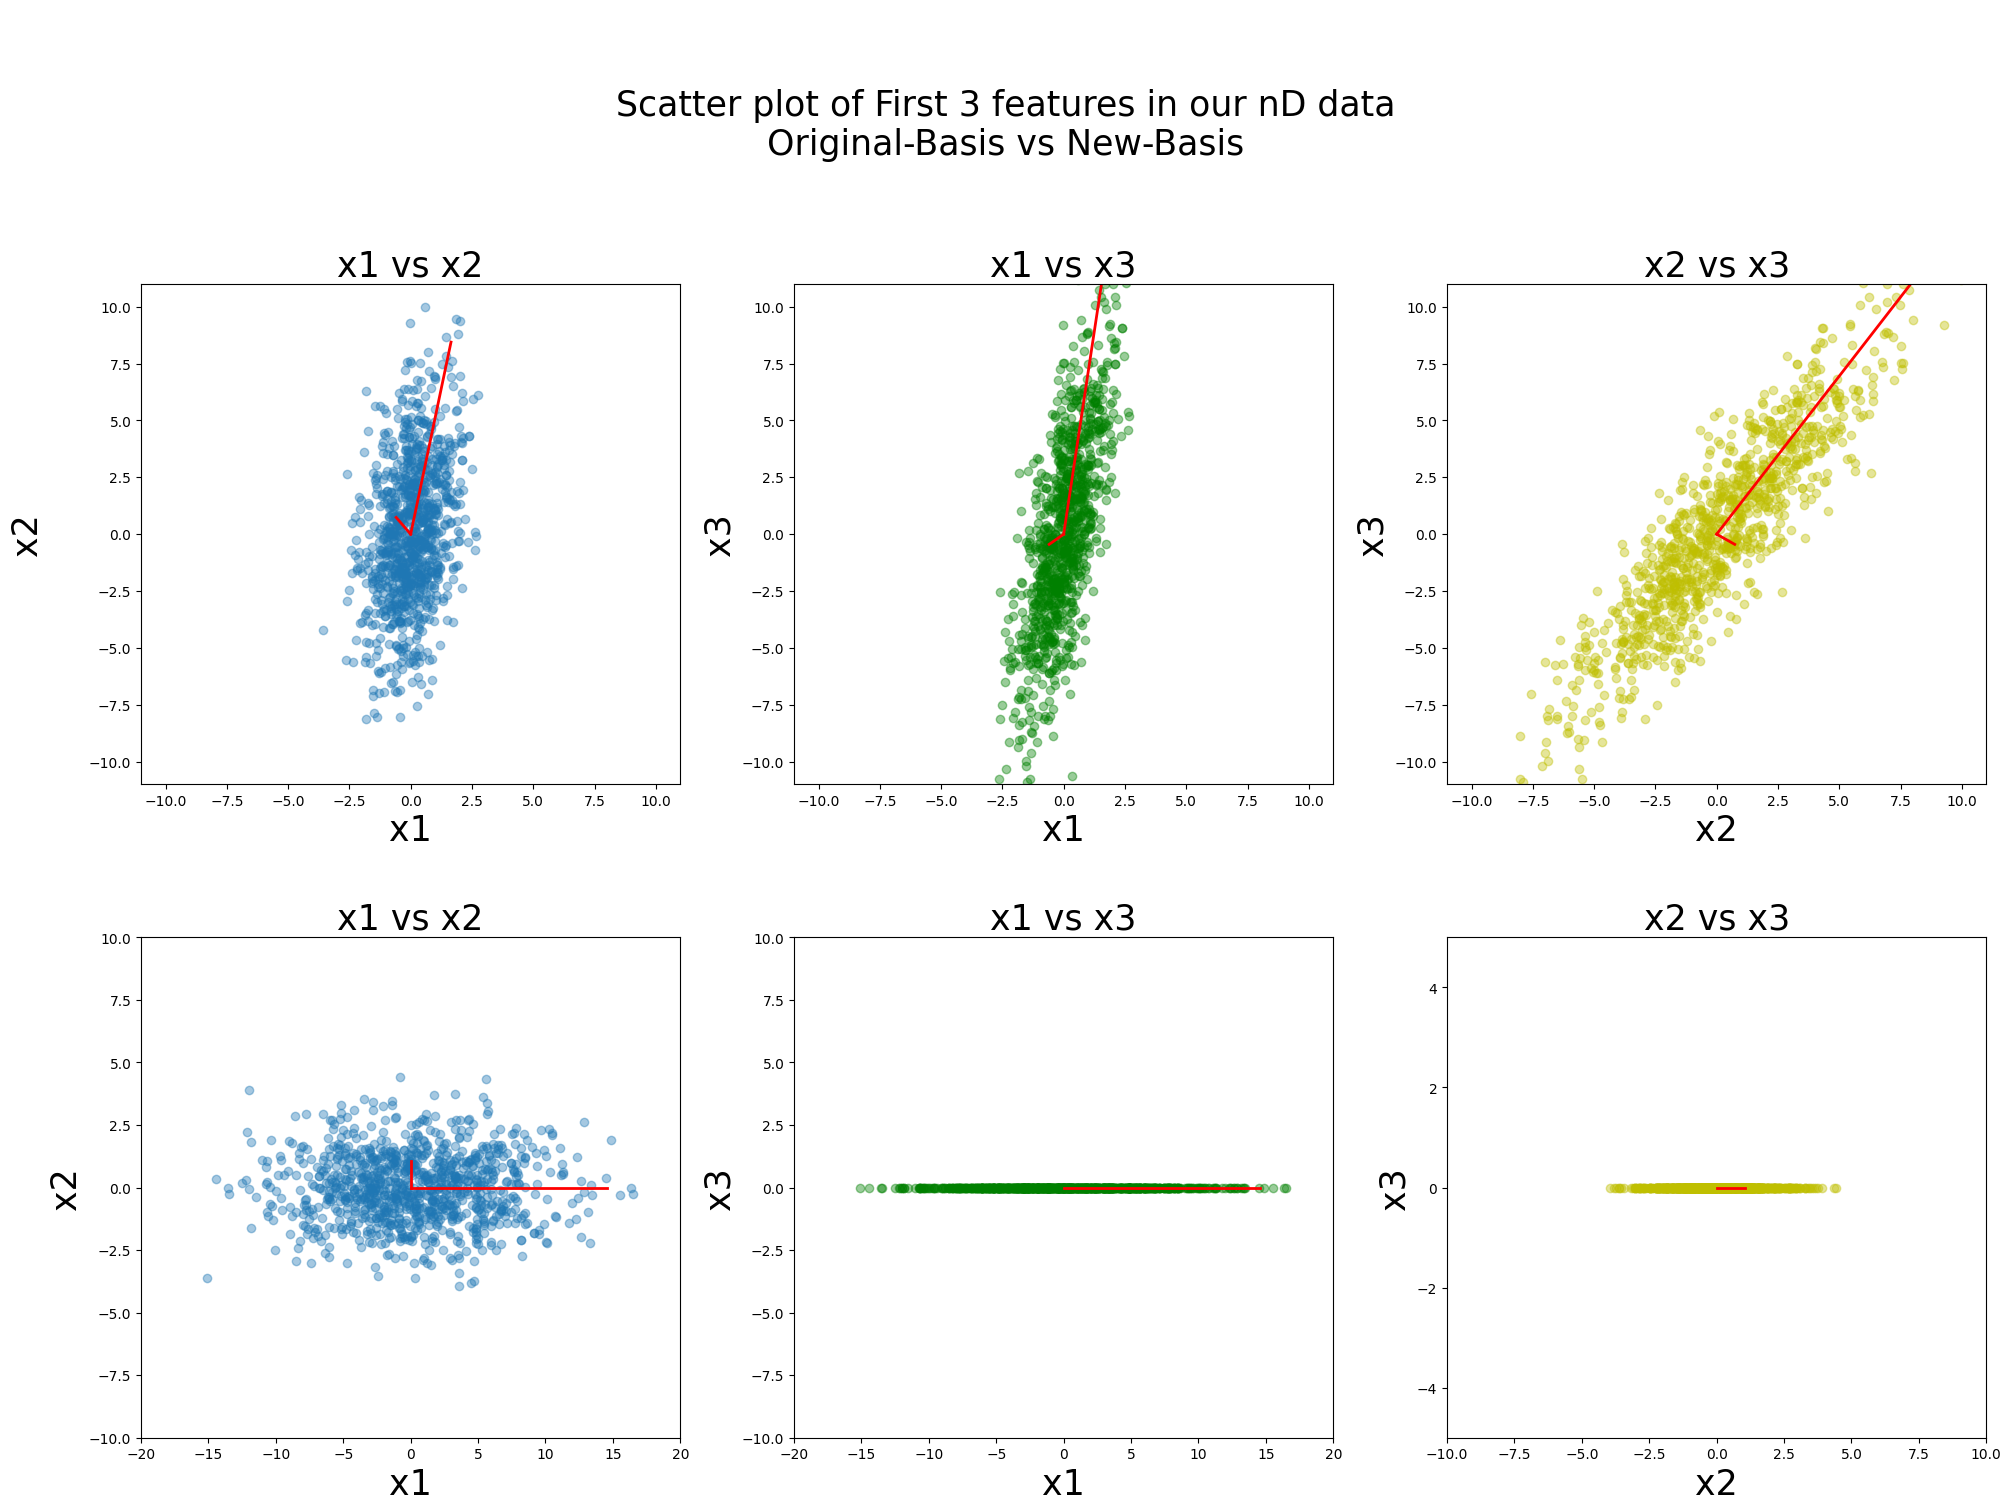

In [24]:
#plot

eig_val = nl
eig_vectors = nV

scale_factor = 0.55

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3, constrained_layout=True, figsize=(20,15))


ax1.scatter(x1,x2,alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax1.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax1.set_title('x1 vs x2',fontsize = 25)
ax1.set_xlabel('x1\n', fontsize = 25)
ax1.set_ylabel('x2\n', fontsize = 25)
ax1.axis([-11,11,-11,11])

ax2.scatter(x1,x3, color = 'g',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax2.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax2.set_title('x1 vs x3',fontsize = 25)
ax2.set_xlabel('x1', fontsize = 25)
ax2.set_ylabel('x3', fontsize = 25)
ax2.axis([-11,11,-11,11])

ax3.scatter(x2,x3, color = 'y',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax3.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax3.set_title('x2 vs x3',fontsize = 25)
ax3.set_xlabel('x2\n', fontsize = 25)
ax3.set_ylabel('x3', fontsize = 25)
ax3.axis([-11,11,-11,11])

ax4.scatter(new_ndata[:,0],new_ndata[:,1],alpha = 0.4)
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax4.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax4.set_title('x1 vs x2',fontsize = 25)
ax4.set_xlabel('x1', fontsize = 25)
ax4.set_ylabel('x2', fontsize = 25)
ax4.axis([-20,20,-10,10])

ax5.scatter(new_ndata[:,0],new_ndata[:,2],alpha = 0.4, color = 'g')
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax5.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax5.set_title('x1 vs x3',fontsize = 25)
ax5.set_xlabel('x1', fontsize = 25)
ax5.set_ylabel('x3', fontsize = 25)
ax5.axis([-20,20,-10,10])

ax6.scatter(new_ndata[:,1],new_ndata[:,2],alpha = 0.4, color = 'y')
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax6.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax6.set_title('x2 vs x3',fontsize = 25)
ax6.set_xlabel('x2', fontsize = 25)
ax6.set_ylabel('x3', fontsize = 25)
ax6.axis([-10,10,-5,5])

fig.suptitle('\n\nScatter plot of First 3 features in our nD data\nOriginal-Basis vs New-Basis\n\n', fontsize = 25)
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [34]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/

--2024-01-18 19:51:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.data’

magic04.data            [  <=>               ]   1.41M  3.61MB/s    in 0.4s    

2024-01-18 19:51:05 (3.61 MB/s) - ‘data/magic04.data’ saved [1477391]

--2024-01-18 19:51:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.names’

magic04.names           [ <=>                ]   5.27K  --.-KB/s    in 0s      

2024-01-18 19:51:05 (60.9 MB/s) - ‘data/mag